In [23]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [26]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
import datetime as dt
import pandas as pd

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
# https://stackoverflow.com/a/31641488
results_jun = []
results_jun = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [27]:
#  3. Convert the June temperatures to a list.
results_list_jun = [x for (x) in results_jun]

In [28]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_df = pd.DataFrame(results_list_jun, columns=['June Temps'])

In [29]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [30]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = []
results_dec = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [31]:
# 7. Convert the December temperatures to a list.
results_dec_list = [x for (x) in results_dec]

In [32]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
December_df = pd.DataFrame(results_dec_list, columns=['December Temps'])

In [33]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
December_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: two additional queries to gather more weather data for June and December.

In [34]:
import matplotlib.pyplot as plt
# Name and create dataframes for Precipation in June and December
results_prcp_jun = []
results_prcp_dec = []
results_prcp_jun = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
results_prcp_dec = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
results_prcp_jun_df = pd.DataFrame(results_prcp_jun, columns=['June Precipation'])
results_prcp_dec_df = pd.DataFrame(results_prcp_dec, columns=['June Precipation'])

In [43]:
results_prcp_jun_df.describe()

,June Precipation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [44]:
results_prcp_dec_df.describe()

,June Precipation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<function matplotlib.pyplot.show(*args, **kw)>

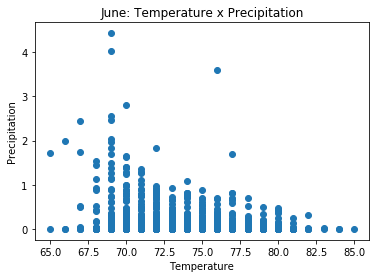

In [42]:
# Make a scatterplot for June temperatures and precipations
plt.scatter(results_list_jun, results_prcp_jun)
plt.xlabel("Temperature")
plt.ylabel("Precipitation")
plt.title("June: Temperature by Precipitation")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

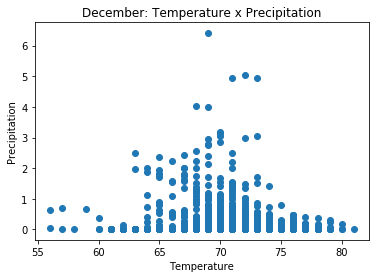

In [41]:
# Make a scatterplot for December temperatures and precipations
plt.scatter(results_dec_list, results_prcp_dec)
plt.xlabel("Temperature")
plt.ylabel("Precipitation")
plt.title("December: Temperature by Precipitation")
plt.show